# Uso de las librerías científicas

## Simulación de una apocalipsis Zombie

[Munz y otros en 2009](http://mysite.science.uottawa.ca/rsmith43/Zombies.pdf) definieron un modelo de invasión zombie mediante un sistema de ecuaciones diferenciales ordinarias:

* _dS/dt = P - B\*S\*Z - d\*S_
* _dZ/dt = B\*S\*Z + G\*R - A\*S\*Z_
* _dR/dt = d\*S + A\*S\*Z - G\*R_

Donde:

    S: el número de víctimas
    Z: el número de zombies
    R: el número de gente asesinada por los zombies
    P: el ratio de nacimientos
    d: la probabilidad de muerte natural
    B: la probabilidad de propagación de la enfermedad zombie (personas vivas y sanas)
    G: la probabilidad de que una persona muerta vuelva a la vida como zombie
    A: la probabilidad de que un zombie sea aniquilado completamente

Scipy puede resolver sistemas de primer orden de ecuaciones diferenciales de forma sencilla. Nos centraremos en resolver la expresión:
_dy/dt = f(y, t)_ donde _y = [S, Z, R]_.

In [1]:
# Cargamos las librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# Declaramos las variables
P = 0 # ratio de nacimientos
d = 0.0001 # porcentaje de muertes naturales por día
B = 0.0095 # porcentaje de transmisión por día
G = 0.0001 # porcentaje de resurrecciones por día
A = 0.0001 # porcentaje de destrucción por día


In [3]:
# resuelve el sistema dy/dt = f(y, t)
def f(y, t):
    Si = y[0]
    Zi = y[1]
    Ri = y[2]
    # El modelo de Munz et al. 2009
    f0 = P - B*Si*Zi - d*Si
    f1 = B*Si*Zi + G*Ri - A*Si*Zi
    f2 = d*Si + A*Si*Zi - G*Ri
    return [f0, f1, f2]

In [4]:
# Escenario inicial
S0 = 500. # población inicial de gente que está por ser atacada por zombies...
Z0 = 0 # población zombie inicial
R0 = 0 # población muertos incial

# vector inicial en cero
y0 = [S0, Z0, R0]

# vector de tiempo
t = np.linspace(0, 5., 1000)

In [5]:
# Aplicamos la solución del sistema
soln = odeint(f, y0, t)

In [6]:
S = soln[:, 0] 
Z = soln[:, 1]
R = soln[:, 2]

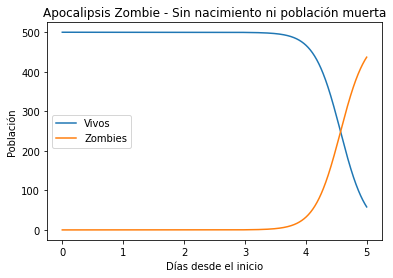

In [7]:
# Reprentamos la linea temporal
plt.figure()
plt.plot(t, S, label="Vivos")
plt.plot(t, Z, label="Zombies")
plt.xlabel(u'Días desde el inicio')
plt.ylabel(u'Población')
plt.title(u'Apocalipsis Zombie - Sin nacimiento ni población muerta')
plt.legend(loc=0)

In [8]:
# Escenario #2
# Cambiamos las condiciones iniciales
R0 = 0.05*S0 # 5% de la población inicial está muerta
P = 100 # 100 nuevos nacimientos por día
y0 = [S0, Z0, R0]

In [9]:
# Aplicamos la solución del sistema
soln = odeint(f, y0, t)
S = soln[:, 0] 
Z = soln[:, 1]
R = soln[:, 2]

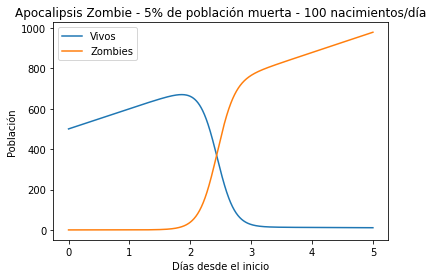

In [10]:
# Reprentamos la linea temporal
plt.figure()
plt.plot(t, S, label="Vivos")
plt.plot(t, Z, label="Zombies")
plt.xlabel(u'Días desde el inicio')
plt.ylabel(u'Población')
plt.title(u'Apocalipsis Zombie - 5% de población muerta - 100 nacimientos/día')
plt.legend(loc=0)

## Ejemplo 2: buscando cristales de proteínas

La criomicroscopía electrónica es una técnica de microscopía muy utilizada en biología estructural en la que la muestra que hay que estudiar se encuentra a temperaturas criogénicas. La siguiente imagen es una solución de la proteína GroEL (Fuente: Wikipedia - "Cryoem groel", Vossman):

<img src="https://www.news-medical.net/image.axd?picture=2017%2F8%2FCryoem_groel_-_680x_.jpg">

Vamos a escribir un código que nos permita contar el número de cristales de GroEL en la imagen:

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage

In [12]:
#import seaborn_image as isns
#seaborn-image v0.4.1

In [13]:
# Carga de la imagen
imagen = mpimg.imread("600px-Cryoem_groel.png")
imagen

array([[0.5803922 , 0.7019608 , 0.2627451 , ..., 0.40392157, 0.3137255 ,
        0.26666668],
       [0.42745098, 0.49411765, 0.44705883, ..., 0.3254902 , 0.32156864,
        0.1882353 ],
       [0.5137255 , 0.40784314, 0.5176471 , ..., 0.49803922, 0.45882353,
        0.24705882],
       ...,
       [0.44313726, 0.43137255, 0.3882353 , ..., 0.5294118 , 0.6862745 ,
        0.73333335],
       [0.45490196, 0.4745098 , 0.4862745 , ..., 0.62352943, 0.4627451 ,
        0.5058824 ],
       [0.67058825, 0.3764706 , 0.42352942, ..., 0.43137255, 0.38431373,
        0.41960785]], dtype=float32)

In [14]:
# Alternativa para convertir img from JPG to PNG
from skimage import io 
imagen2 = io.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Cryoem_groel.jpg/600px-Cryoem_groel.jpg')
imagen2

array([[148, 179,  67, ..., 103,  80,  68],
       [109, 126, 114, ...,  83,  82,  48],
       [131, 104, 132, ..., 127, 117,  63],
       ...,
       [113, 110,  99, ..., 135, 175, 187],
       [116, 121, 124, ..., 159, 118, 129],
       [171,  96, 108, ..., 110,  98, 107]], dtype=uint8)

In [15]:
imagen

array([[0.5803922 , 0.7019608 , 0.2627451 , ..., 0.40392157, 0.3137255 ,
        0.26666668],
       [0.42745098, 0.49411765, 0.44705883, ..., 0.3254902 , 0.32156864,
        0.1882353 ],
       [0.5137255 , 0.40784314, 0.5176471 , ..., 0.49803922, 0.45882353,
        0.24705882],
       ...,
       [0.44313726, 0.43137255, 0.3882353 , ..., 0.5294118 , 0.6862745 ,
        0.73333335],
       [0.45490196, 0.4745098 , 0.4862745 , ..., 0.62352943, 0.4627451 ,
        0.5058824 ],
       [0.67058825, 0.3764706 , 0.42352942, ..., 0.43137255, 0.38431373,
        0.41960785]], dtype=float32)

In [16]:
# Podemos realizar una copia de backup
im = imagen.copy()

In [17]:
# Aplicamos el filtro gaussiano con tamaño de kernel 3
im_g = ndimage.gaussian_filter(im, 1.2)
im_g

array([[0.5288956 , 0.5021483 , 0.47482386, ..., 0.29785645, 0.3001377 ,
        0.28151453],
       [0.49828994, 0.48471075, 0.47053617, ..., 0.29610574, 0.30161202,
        0.28457713],
       [0.48306838, 0.4836045 , 0.4812301 , ..., 0.285317  , 0.29829288,
        0.29500684],
       ...,
       [0.4825368 , 0.4762859 , 0.49164203, ..., 0.5504981 , 0.5652611 ,
        0.5785229 ],
       [0.49070096, 0.4757372 , 0.47948283, ..., 0.5185768 , 0.5215778 ,
        0.52576494],
       [0.51145756, 0.48210204, 0.46957925, ..., 0.48139337, 0.4739309 ,
        0.47074097]], dtype=float32)

In [18]:
# Normalización de los valores
im_norm = (im_g - im_g.min()) / (float(im_g.max()) - im_g.min())
im_norm[im_norm < 0.5] = 0
im_norm[im_norm >=0.5] = 1

In [19]:
im_norm

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [20]:
# Convertimos la imagen utilizando el etiquetado de scipy
result = 255 - (im_norm * 255).astype(np.uint8)
result

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

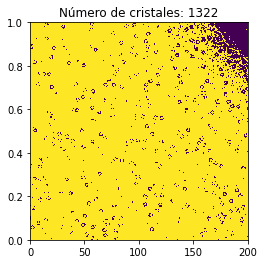

In [21]:
# mostramos la imagen
plt.title(u"Número de cristales: %d" % ndimage.label(result)[1])
img = plt.imshow(np.asarray(im_norm), interpolation="nearest", extent=[0,200,0,1], aspect=200)
plt.show()

## Ejercicio opcional


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import seaborn as sns


In [23]:
data = plt.imread("../data/SEM_image.jpg")
data

array([[134, 128, 125, ...,   2,   2,   2],
       [132, 128, 126, ...,   1,   1,   1],
       [131, 127, 127, ...,   1,   1,   1],
       ...,
       [100, 102, 103, ..., 137, 137, 137],
       [101, 113, 116, ..., 138, 138, 138],
       [119, 117, 111, ..., 134, 138, 142]], dtype=uint8)

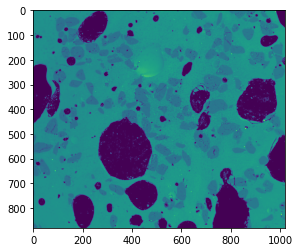

In [24]:
plt.imshow(data)

In [25]:
# Aplicamos el filtro de mediana para reducir el ruido
filtdata = ndimage.median_filter(data, size=(7,7))
filtdata

array([[128, 128, 127, ...,   0,   1,   1],
       [128, 128, 127, ...,   0,   1,   1],
       [127, 128, 127, ...,   0,   1,   1],
       ...,
       [102, 102, 102, ..., 137, 137, 137],
       [103, 103, 103, ..., 137, 137, 137],
       [103, 103, 103, ..., 137, 137, 137]], dtype=uint8)

c:\users\jd\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

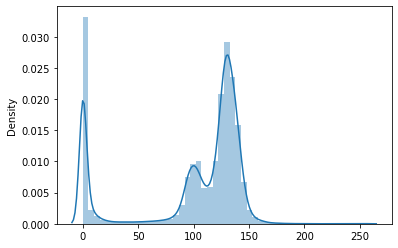

In [26]:
sns.distplot(data)

c:\users\jd\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

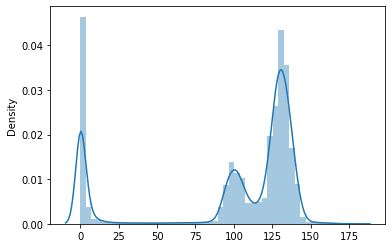

In [27]:
sns.distplot(filtdata)

* Utilizando los valores del distribution plot de la imagen filtrada, determina unos umbrales que permitan diferenciar los píxeles de arena, los píxeles de vidrio y los píxeles de burbuja.

In [28]:
# dividimos la imagen en 3 umbrales
burbujas = filtdata <= 50
arena = np.logical_and(filtdata > 50, filtdata <= 112.5)
vidrio = filtdata > 112.5

In [29]:
# Asignamos los colores diferentes por cada clase
elementos = burbujas.astype(np.int) + 2*arena.astype(np.int) + 3*vidrio.astype(np.int)
elementos

array([[3, 3, 3, ..., 1, 1, 1],
       [3, 3, 3, ..., 1, 1, 1],
       [3, 3, 3, ..., 1, 1, 1],
       ...,
       [2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3],
       [2, 2, 2, ..., 3, 3, 3]])

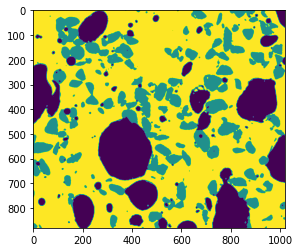

In [30]:
plt.imshow(elementos)

## Alternativa con SNS-IMAGE

In [32]:
import seaborn_image as isns

c:\users\jd\appdata\local\programs\python\python38-32\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The validate_legend_loc function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]


In [33]:
sem_img = plt.imread('../data/SEM_image.jpg')
sem_img

array([[134, 128, 125, ...,   2,   2,   2],
       [132, 128, 126, ...,   1,   1,   1],
       [131, 127, 127, ...,   1,   1,   1],
       ...,
       [100, 102, 103, ..., 137, 137, 137],
       [101, 113, 116, ..., 138, 138, 138],
       [119, 117, 111, ..., 134, 138, 142]], dtype=uint8)

<AxesSubplot:>

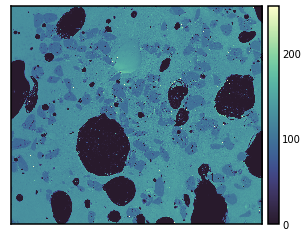

In [34]:
# Mostramos la imagen utilizando la función `imgplot` de `seaborn_image`.
isns.imgplot(sem_img, orientation='v', origin='upper')